# KNOW DIABETES-A Data Driven Approach to Early Detection-CAPSTONE PROJECT ##

**Table of contents**<a id='toc0_'></a>    
- [Topic Introduction](#toc1_)    
- [Setup](#toc2_)    
- [Data Preparation and Cleaning](#toc3_)    
  - [Data Loading and Understanding](#toc3_1_)    
  - [Formatting & Validity](#toc3_2_)    
  - [Checking for Duplicates and Redundant Information](#toc3_3_)    
  - [Missing Data](#toc3_4_)    
- [Visualization and Analysis](#toc4_)    
  - [Assessing Which Columns Are Relevant to Our Analysis](#toc4_1_)    
  - [Univariate Visualizations for Numerical Features](#toc4_2_)
  - [Summary: Univariate Insights for Numerical Features](#toc4_2_)
  - [Univariate Visualizations for Categorical Features](#toc4_2_)
  - [Summary: Univariate Insights for Categorical Features](#toc4_2_)
  - [Multivariate Analysis for Numerical Features w.r.t Target variable](#toc4_3_) 
  - [Summary: Multivariate Analysis Insights for Numerical Features](#toc4_3_)
  - [Multivariate Analysis for Categorical Features w.r.t Target variable](#toc4_3_)
  - [Summary: Multivariate Analysis Insights for Categorical Features](#toc4_3_)  
- [Feature Engineering-One Hot Encoding](#toc5_)  
    - [Correlation Matrix and VIF](#toc4_3_)
    - [Hypothesis Testing](#toc4_3_)
        -[Chi-Sqaured test for independence](#toc4_3_)
        -[2 Samples unpaired t-test](#toc4_3_)
  

## TOPIC INTRODUCTION 

Diabetes is a major public health concern, affecting millions and costing over $320 billion annually in the U.S. alone. This burden impacts both individuals and the healthcare system, underscoring the need for early detection and prevention.

This project uses data from the 2015 Behavioral Risk Factor Surveillance System (BRFSS)—a health-related telephone survey conducted by the Centers for Disease Control and Prevention (CDC)—which includes responses from 253,680 U.S. adults. The goal is to build a machine learning model that predicts diabetes risk based on key health indicators, enabling early intervention and reducing long-term healthcare costs.

The dataset will be cleaned, wrangled, and prepared for in-depth analysis and modeling to support data-driven preventive strategies.

## SETUP ###

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
import random
# Helpful extra functionality
from scipy import special
from typing import List, Dict, Optional
import mpl_toolkits.mplot3d as m3d
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import statsmodels.api as sm
from collections import Counter
from scipy import stats
from scipy.stats import norm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.utils import resample
import joblib

In [2]:
# Setting globally figure size in the notebook
plt.rcParams["figure.figsize"] = (4.0, 3.0)

In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  

## DATA PREPARATION AND CLEANING

#### Data Loading and Understanding 

In [5]:
import pandas as pd

# Correct file path (raw string to avoid backslash issues)
#file_path = r"C:\Users\LENOVO\OneDrive\diabetes_data\diabetes_binary_health_indicators_BRFSS2015.csv"
file_path=r"C:\Users\LENOVO\OneDrive\Desktop\CDC Diabetes 2015 Dataset.csv"

# Load the dataset
diabetes_df = pd.read_csv(file_path)


We will be using health data collected from 253,680 individuals in the United States as part of the Behavioral Risk Factor Surveillance System (BRFSS)—a nationwide health-related telephone survey conducted by the Centers for Disease Control and Prevention (CDC). This dataset was collected in 2015 and will be used to explore health indicators and build a predictive model for diabetes using machine learning.

#### Data Dictionary: BRFSS Diabetes Dataset

####  Demographic & Lifestyle Data

| Feature              | Type        | Description                                                                                       | Values / Scale                                                                                      |
|----------------------|-------------|---------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| `Sex`                | Categorical | Biological sex                                                                                    | 0 = Female, 1 = Male                                                                                 |
| `Age`                | Integer     | Age group                                                                                         | e.g., 1 = 18–24, 9 = 60–64, 13 = 80+                                                                 |
| `Education`          | Integer     | Education level scale (1–6)                                                                       | 1 = No school, 2 = Grades 1–8, 3 = Some HS, 4 = HS grad, 5 = Some college, 6 = College grad           |
| `Income`             | Integer     | Income bracket scale (1–8)                                                                        | 1 = < $10k, ... 5 = < $35k, 8 = ≥ $75k                                                               |
| `PhysActivity`       | Categorical | Physical activity in past 30 days                                                                 | 0 = No, 1 = Yes                                                                                      |
| `Fruits`             | Categorical | Regular fruit consumption                                                                         | 0 = No, 1 = Yes                                                                                      |
| `Smoker`             | Categorical | Smoked ≥ 100 cigarettes in lifetime *(5 packs = 100 cigarettes)*                                 | 0 = No, 1 = Yes                                                                                      |
| `Veggies`            | Categorical | Regular vegetable consumption                                                                     | 0 = No, 1 = Yes                                                                                      |
| `HvyAlcoholConsump`  | Categorical | Heavy alcohol use (Men >14 drinks/week, Women >7)                                                 | 0 = No, 1 = Yes                                                                                      |

---

#### Health & Medical History

| Feature                | Type        | Description                                                                                         | Values / Scale                                                                 |
|------------------------|-------------|-----------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| `HighBP`               | Categorical | High blood pressure                                                                                 | 0 = No, 1 = Yes                                                                 |
| `HighChol`             | Categorical | High cholesterol                                                                                    | 0 = No, 1 = Yes                                                                 |
| `CholCheck`            | Categorical | Cholesterol checked in past 5 years                                                                 | 0 = No, 1 = Yes                                                                 |
| `Stroke`               | Categorical | Ever had a stroke                                                                                   | 0 = No, 1 = Yes                                                                 |
| `HeartDiseaseorAttack`| Categorical | Coronary heart disease or heart attack                                                              | 0 = No, 1 = Yes                                                                 |
| `GenHlth`              | Integer     | General health self-assessment                                                                      | 1 = Excellent to 5 = Poor                                                      |
| `MentHlth`             | Integer     | Days mental health not good (past 30 days)                                                          | Range: 0–30                                                                    |
| `PhysHlth`             | Integer     | Days physical health not good (past 30 days)                                                        | Range: 0–30                                                                    |
| `DiffWalk`             | Categorical | Difficulty walking or climbing stairs                                                               | 0 = No, 1 = Yes                                                                 |
| `HvyAlcoholConsump`    | Categorical | Heavy alcohol use (duplicate for consistency)                                                       | 0 = No, 1 = Yes                                                                 |
| `BMI`                  | Float       | Body Mass Index = weight (kg) / height² (m²)                                                        | Continuous                                                                     |

---

#### Healthcare Access

| Feature           | Type        | Description                                                                                         | Values / Scale |
|-------------------|-------------|-----------------------------------------------------------------------------------------------------|----------------|
| `AnyHealthcare`   | Categorical | Any health coverage (insurance, HMO, etc.)                                                          | 0 = No, 1 = Yes |
| `NoDocbcCost`     | Categorical | Couldn't see doctor in past year due to cost                                                        | 0 = No, 1 = Yes |

---

#### Field of Interest (Target Variable)

| Feature            | Type        | Description                                                    | Values                                  |
|--------------------|-------------|----------------------------------------------------------------|------------------------------------------|
| `Diabetes_binary`  | Categorical | Has diabetes or prediabetes                                    | 0 = No diabetes, 1 = Prediabetes/Diabetes |


####  <a id='toc3_2_'></a>Formatting & Validity [&#8593;](#toc0_)
Data cleaning can be broken down into three main areas:

   - Checking that datatypes and formatting is all correct.
   - Checking for duplicates.
   - Checking for null (missing) values.
   

In [6]:
diabetes_df #checking our dataframe

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1


In [7]:
# Rename columns for better readability
diabetes_df.rename(columns={'Diabetes_012':'Diabetes_Class',                
    'HvyAlcoholConsump': 'Heavy_Alcohol_Use',
    'HeartDiseaseorAttack': 'HeartDisease_or_Attack',
    'NoDocbcCost': 'Doctor_unavailable_cost','DiffWalk': 'Difficulty_Walking',
    'Education': 'Education_Level','Age': 'Age_Group',
    'PhysHlth': 'Physical_Health','MentHlth': 'Mental_Health',
    'PhysActivity': 'Physical_Activity','GenHlth': 'General_Health'                       
}, inplace=True)


In [8]:
diabetes_df.head(10) # Quick Look at our first 10 observations

,Diabetes_Class,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDisease_or_Attack,Physical_Activity,Fruits,...,AnyHealthcare,Doctor_unavailable_cost,General_Health,Mental_Health,Physical_Health,Difficulty_Walking,Sex,Age_Group,Education_Level,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,...,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,...,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,...,1,0,3,0,0,1,0,11,4,4
8,2,1,1,1,30,1,0,1,0,1,...,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,...,1,0,2,0,0,0,1,8,4,3


In [9]:
diabetes_df.shape

(253680, 22)

In [10]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_Class,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDisease_or_Attack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
Physical_Activity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [11]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Diabetes_Class           253680 non-null  int64
 1   HighBP                   253680 non-null  int64
 2   HighChol                 253680 non-null  int64
 3   CholCheck                253680 non-null  int64
 4   BMI                      253680 non-null  int64
 5   Smoker                   253680 non-null  int64
 6   Stroke                   253680 non-null  int64
 7   HeartDisease_or_Attack   253680 non-null  int64
 8   Physical_Activity        253680 non-null  int64
 9   Fruits                   253680 non-null  int64
 10  Veggies                  253680 non-null  int64
 11  Heavy_Alcohol_Use        253680 non-null  int64
 12  AnyHealthcare            253680 non-null  int64
 13  Doctor_unavailable_cost  253680 non-null  int64
 14  General_Health           253680 non-

Our data has 253,680 instances with 22 features. However, we know that apart from certain features like BMI, Mental Health and Physical Health (discrete/continous variables), rest all can be converted to int type as they are essentially categorical columns classified in less than 6 different categories and is more suitable for data preprocessing and modelling. In other words, these columns have stored numerically but they are essentially categorical, so it is better to deal with integers rather than float

#### Checking for Duplicates and Redundant Information

In [12]:
# Check duplicated rows ONCE and store result
duplicates_mask = diabetes_df.duplicated()
n_duplicates = duplicates_mask.sum()

print(f"Total duplicated rows: {n_duplicates}")
print(f"Percentage duplicated: {duplicates_mask.mean() * 100:.2f}%")

# Check distribution of duplicated rows by target class
dup_class_dist = diabetes_df[duplicates_mask].groupby('Diabetes_Class').size()
print("\nDuplicate Distribution by Target Class:")
print(dup_class_dist)

# Drop duplicates
diabetes_df = diabetes_df.drop_duplicates()

# Final check
print(f"\nRemaining duplicates after drop: {diabetes_df.duplicated().sum()}")
print(f"Final dataset shape: {diabetes_df.shape}")


Total duplicated rows: 23899
Percentage duplicated: 9.42%

Duplicate Distribution by Target Class:
Diabetes_Class
0    23648
1        2
2      249
dtype: int64

Remaining duplicates after drop: 0
Final dataset shape: (229781, 22)


***Observations:***

24,206 rows are having duplicated entries. In other words, 9.42 % of our entire data is duplicated. 
When we groupby the target variable, we can see that most of the observations are for NO diabetes class (0), this can further imbalance our dataset.
Therefore, we need to drop them to ensure that their is no over-representation of some patients profile and reduce bias

In [13]:
diabetes_df.info() #our instances has reduced now to 229,781  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Diabetes_Class           229781 non-null  int64
 1   HighBP                   229781 non-null  int64
 2   HighChol                 229781 non-null  int64
 3   CholCheck                229781 non-null  int64
 4   BMI                      229781 non-null  int64
 5   Smoker                   229781 non-null  int64
 6   Stroke                   229781 non-null  int64
 7   HeartDisease_or_Attack   229781 non-null  int64
 8   Physical_Activity        229781 non-null  int64
 9   Fruits                   229781 non-null  int64
 10  Veggies                  229781 non-null  int64
 11  Heavy_Alcohol_Use        229781 non-null  int64
 12  AnyHealthcare            229781 non-null  int64
 13  Doctor_unavailable_cost  229781 non-null  int64
 14  General_Health           229781 non-

In [14]:
# Checking for Duplicated Columns
diabetes_df.T.duplicated()

Here, we can see that there is no duplicated columns or no column is giving repeated information. So we keep all the columns

#### Missing Data

In [15]:
diabetes_df.isna().mean() * 100

Diabetes_Class             0.0
HighBP                     0.0
HighChol                   0.0
CholCheck                  0.0
BMI                        0.0
Smoker                     0.0
Stroke                     0.0
HeartDisease_or_Attack     0.0
Physical_Activity          0.0
Fruits                     0.0
Veggies                    0.0
Heavy_Alcohol_Use          0.0
AnyHealthcare              0.0
Doctor_unavailable_cost    0.0
General_Health             0.0
Mental_Health              0.0
Physical_Health            0.0
Difficulty_Walking         0.0
Sex                        0.0
Age_Group                  0.0
Education_Level            0.0
Income                     0.0
dtype: float64

Here, we can see that there is no NULL values in our dataset. We are good to proceed to Exploratory Data Analysis (EDA)

## VISUALIZATION AND ANALYSIS (EDA)

#### Assessing Which Columns Are Relevant to Our Analysis


Before we spend time analyzing the dataset we should determine which columns are actually relevant to what we want answered. This can also be done prior to data cleaning so you don't spend time cleaning columns that you don't need. However, for my dataset, at this point, it is difficult to determine which features are irrelevant and I will keep all of them at this stage.

#### Univariate Analysis for Numerical Features

In our dataset, apart from Mental Helath, Physical Health and BMI, all the other features are categorical in nature which have certain classification as an outcome. Therefore, let us first explore relationship of numerical columns in our dataset.

In [16]:
# Define the numeric/continuous columns
ncol = ['Mental_Health', 'Physical_Health', 'BMI']

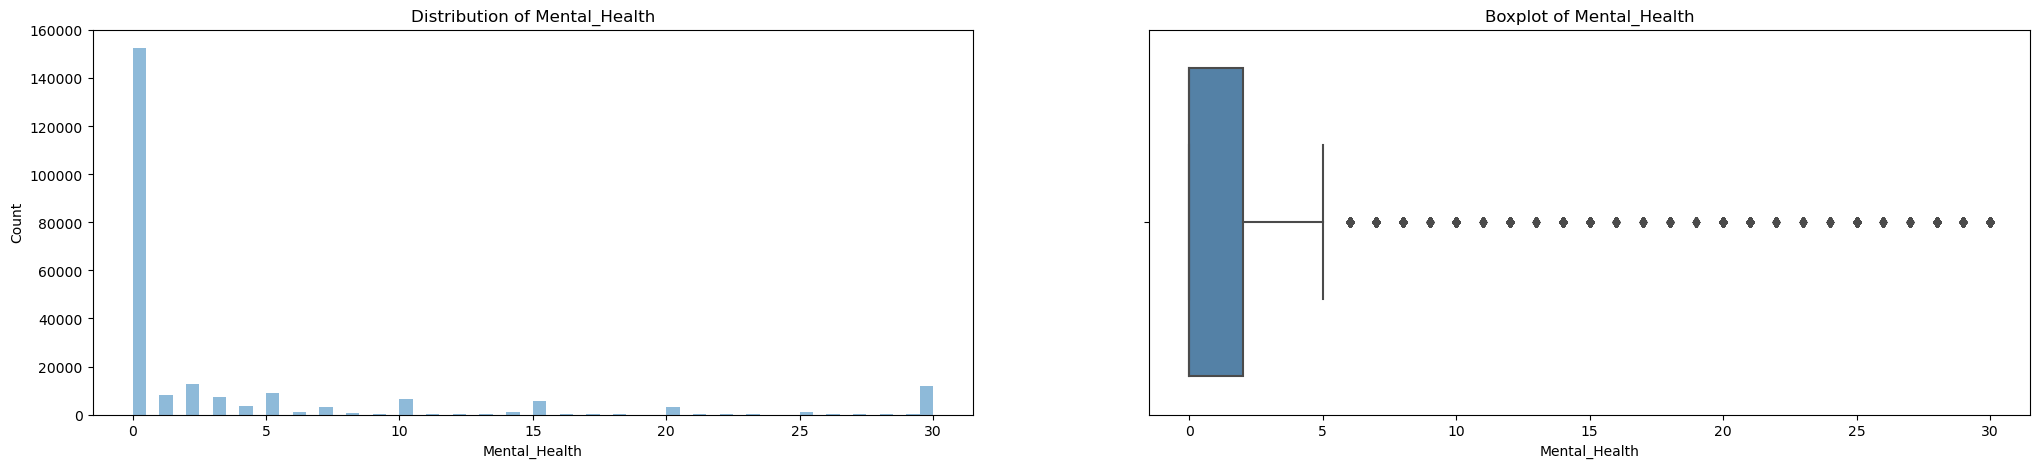

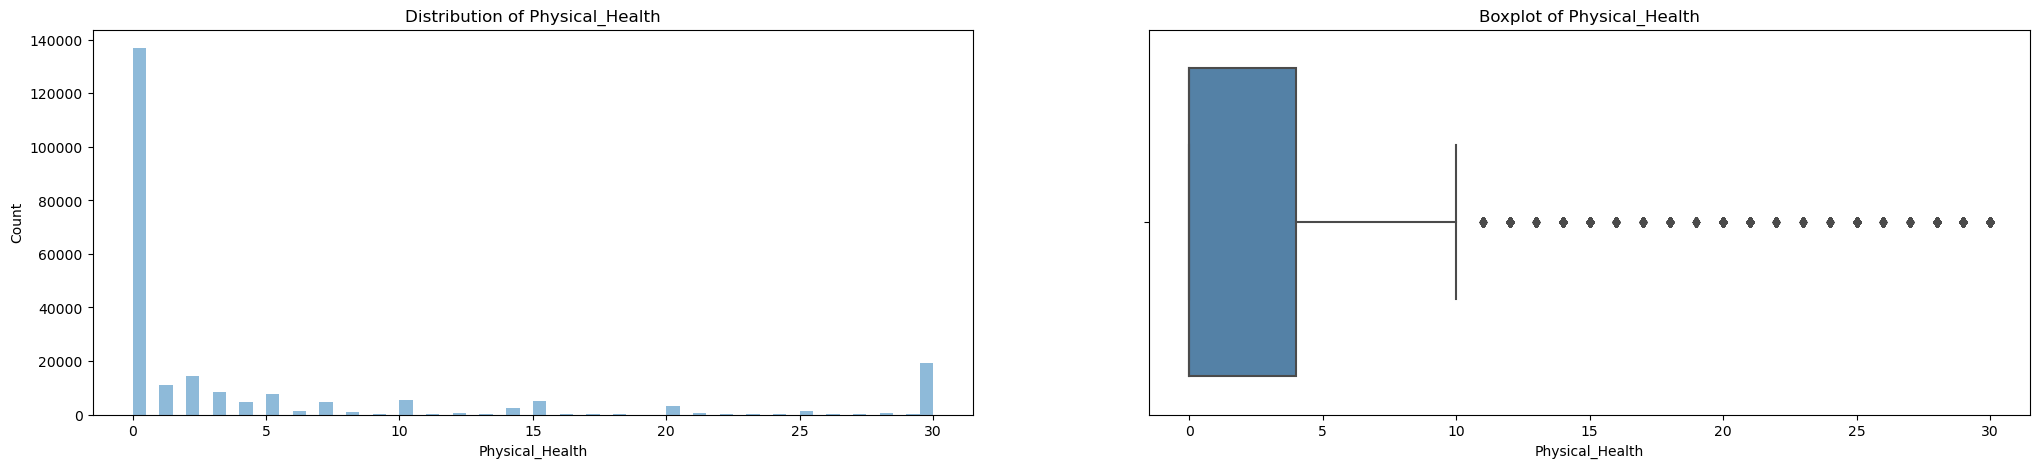

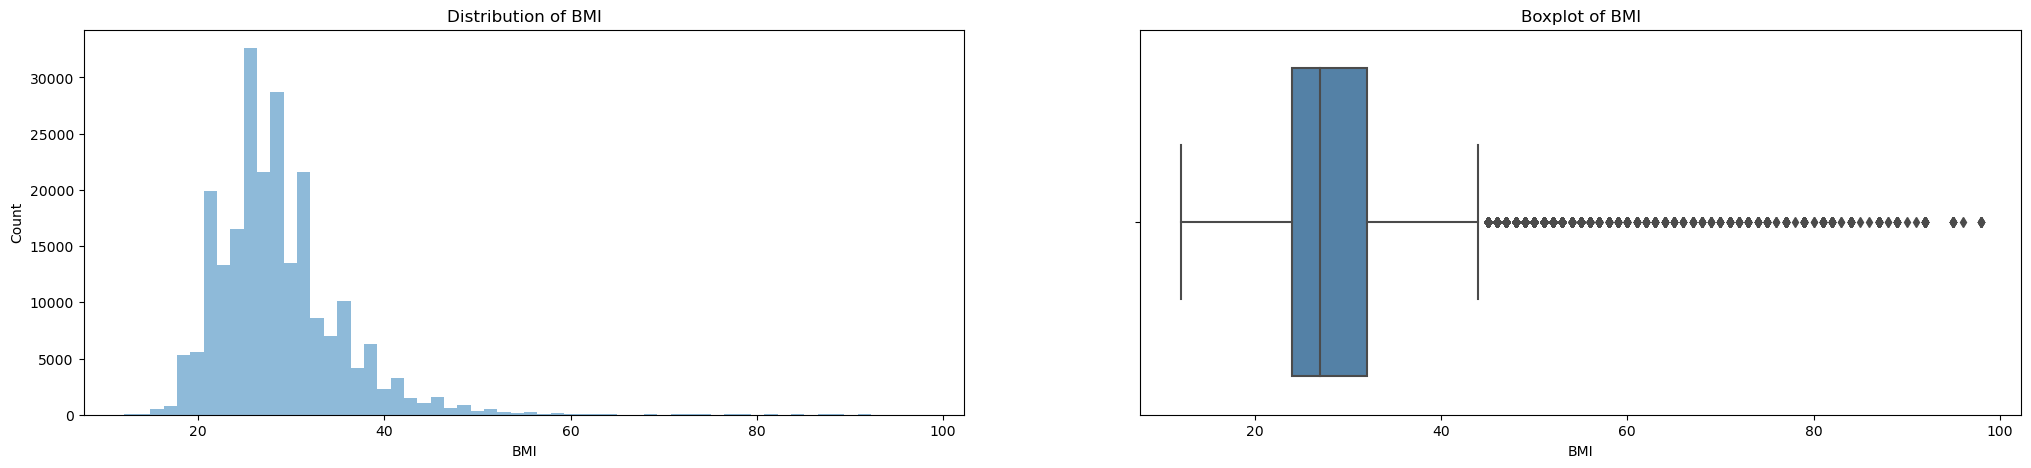

In [17]:
# Use a for loop to generate the plots and use subplots this time
# Visualize the 3 numeric columns using a histogram and boxplot
for column in ncol:
    fig = plt.subplots(1, 2, figsize=(25, 5))

    # Plot out the histogram
    plt.subplot(1, 2, 1)
    plt.hist(diabetes_df[column], bins=60, alpha=0.5)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")

    # Plot the boxplot. We can use the seaborn boxplot code for this.
    plt.subplot(1, 2, 2)
    sns.boxplot(x=diabetes_df[column], color="steelblue")
    plt.title(f"Boxplot of {column}")

    plt.show()
    

In [18]:
diabetes_df[['Mental_Health', 'Physical_Health', 'BMI']].describe().T

,count,mean,std,min,25%,50%,75%,max
Mental_Health,229781.0,3.505373,7.713725,0.0,0.0,0.0,2.0,30.0
Physical_Health,229781.0,4.675178,9.046568,0.0,0.0,0.0,4.0,30.0
BMI,229781.0,28.685670,6.786360,12.0,24.0,27.0,32.0,98.0


#### Summary: Univariate Insights for Numerical Features

Mental Health & Physical Health are highly right skewed. Most of the patients have 0-5 poor health and physical days in a month. There is a noticeably spike at 30 days which might indicate chronic patients. The boxplots should that both of these features have significant outliers especially for Mentalh Health (>5 days) and Physical Health (>10 days).
Also, interesting note here is that mean is greatly affected by the outliers at 30 days which causes the Mean > median. This indicates that median is a more robut metric and less perceptive to outliers.

BMI appears slightly right-skewed, but with the mean and median close in value (from describe table), the distribution remains approximately symmetric for most patients, with a few extreme outliers. Majority of the patients have a BMI of 25-35 range.From Boxplot,that patients having BMI above > 45 are considered as outliers.

#### Univariate Analysis for Categorical Features

In [19]:
# Treat all other columns as categorical
ccat = [col for col in diabetes_df.columns if col not in ncol]

print(ccat)

['Diabetes_Class', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDisease_or_Attack', 'Physical_Activity', 'Fruits', 'Veggies', 'Heavy_Alcohol_Use', 'AnyHealthcare', 'Doctor_unavailable_cost', 'General_Health', 'Difficulty_Walking', 'Sex', 'Age_Group', 'Education_Level', 'Income']


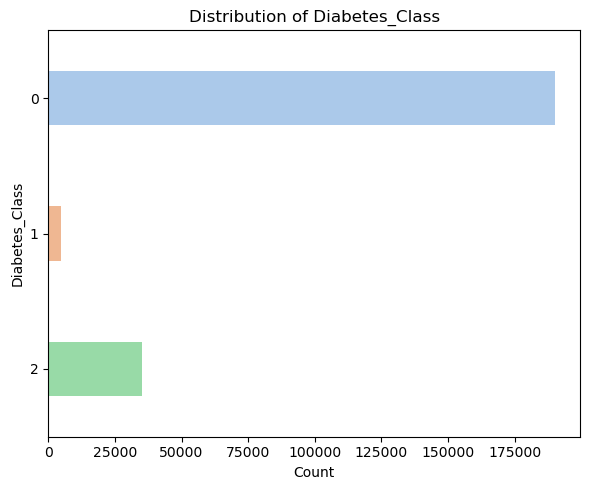

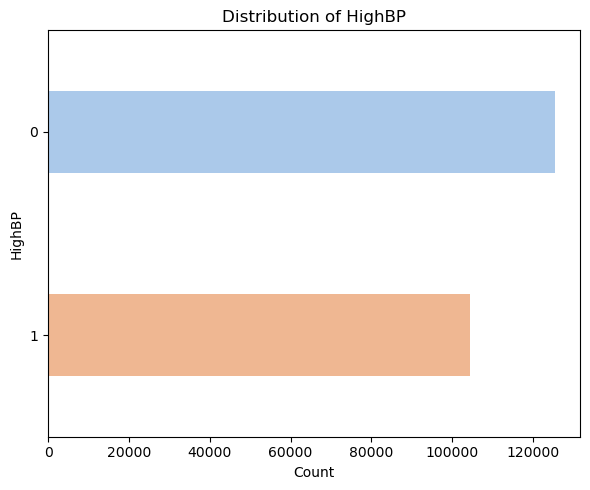

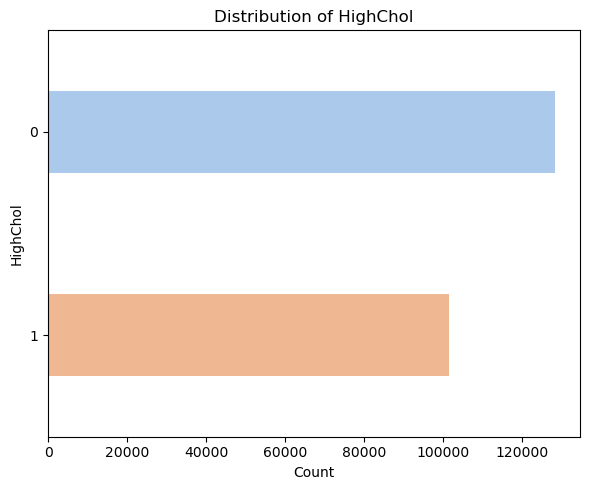

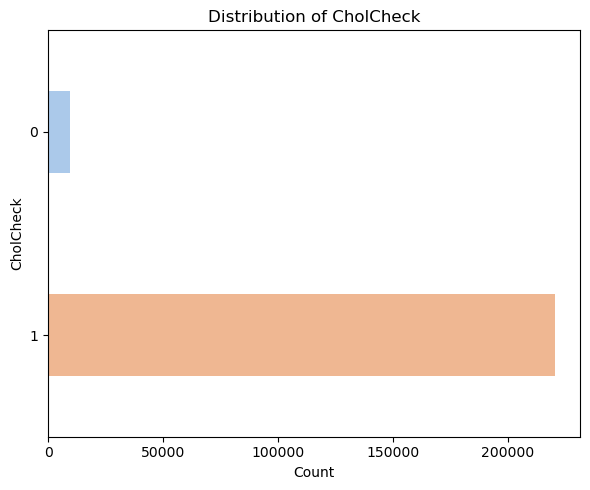

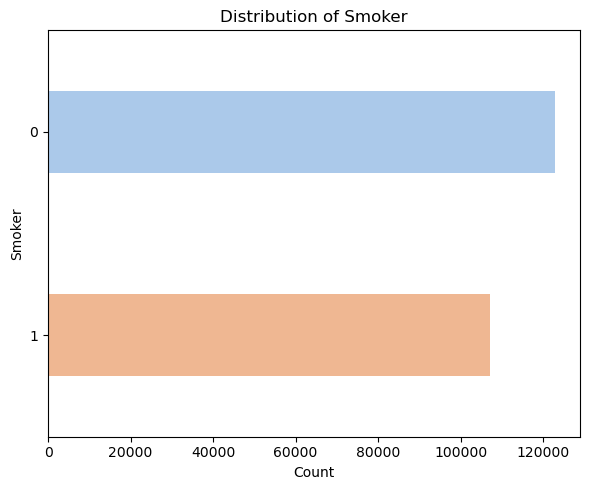

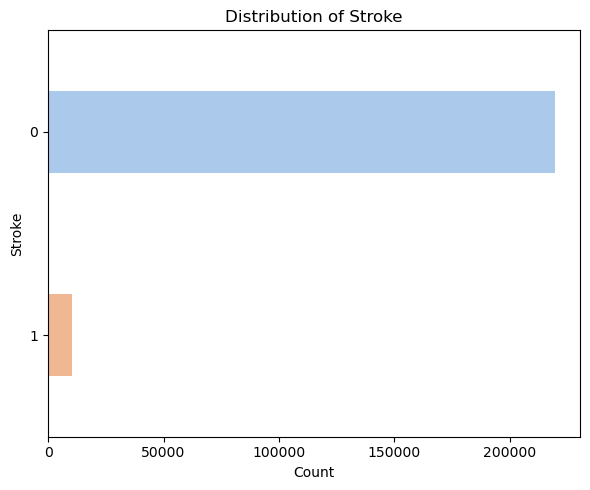

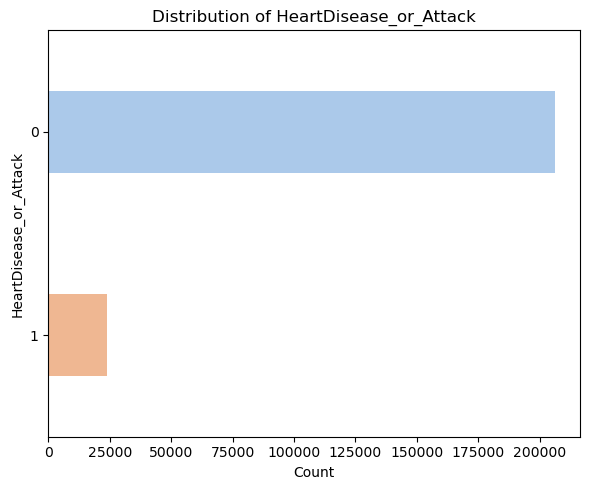

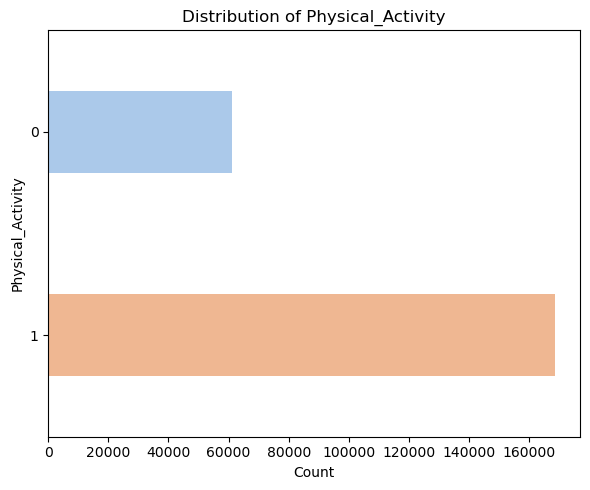

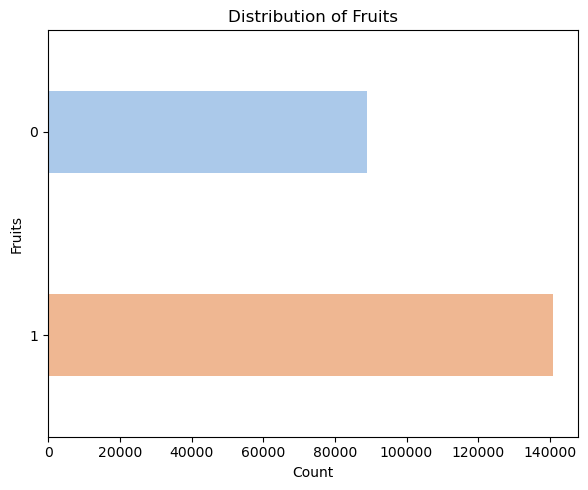

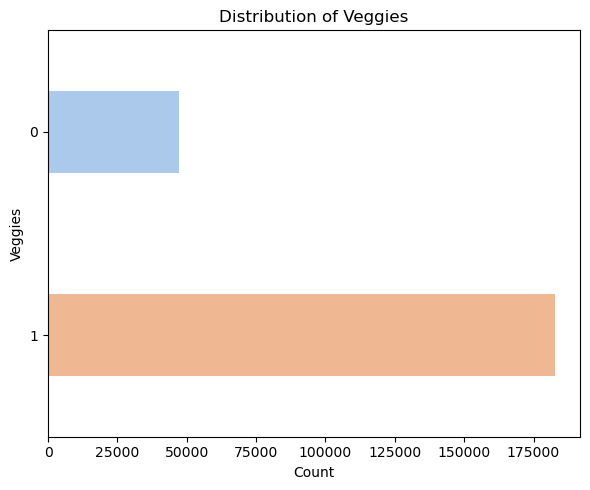

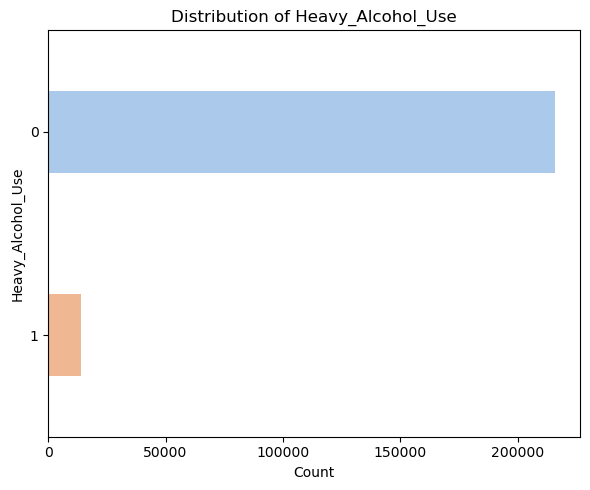

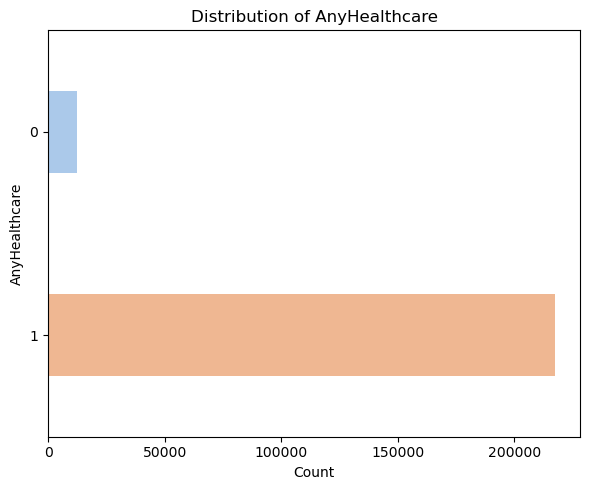

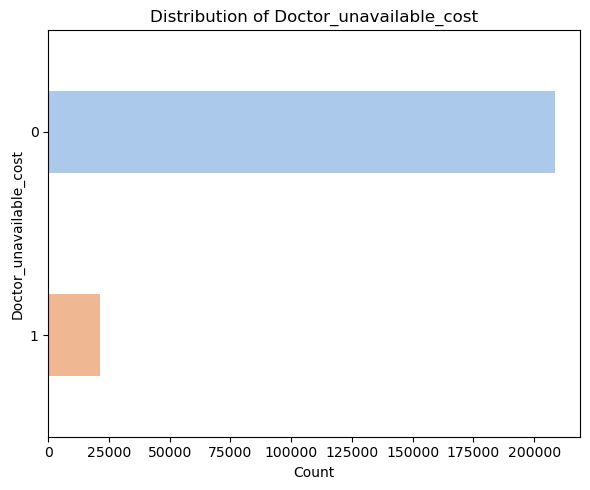

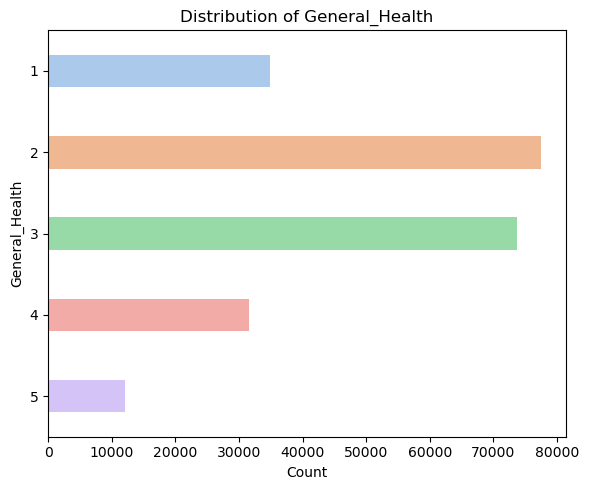

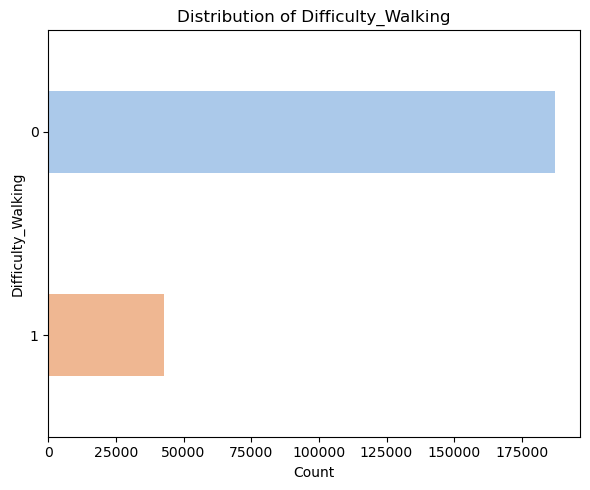

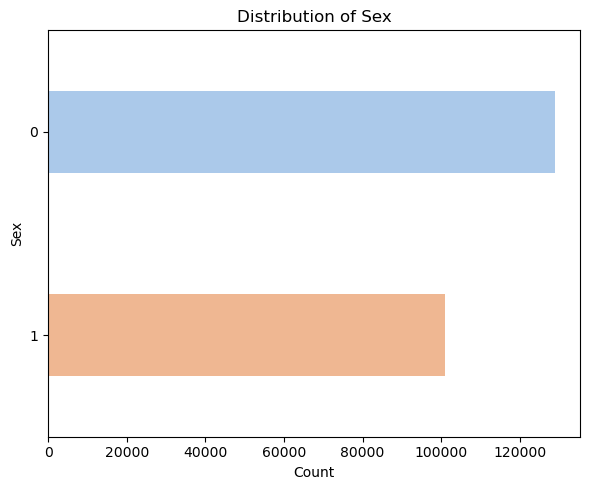

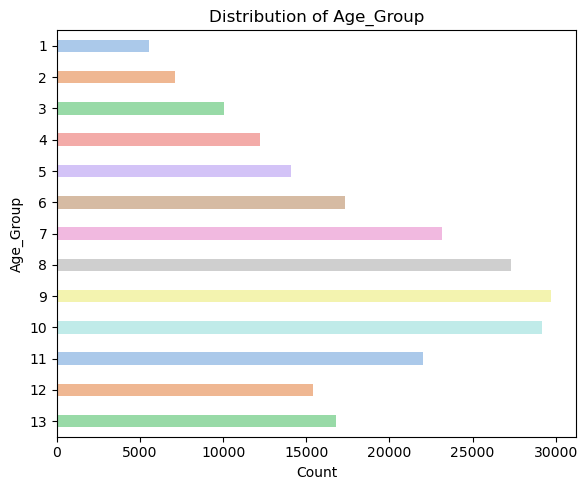

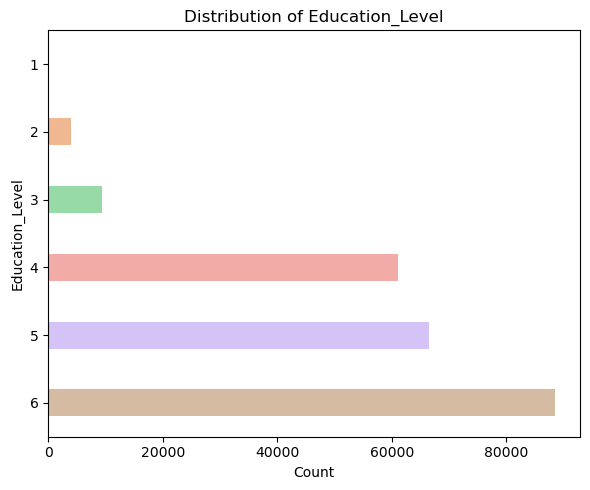

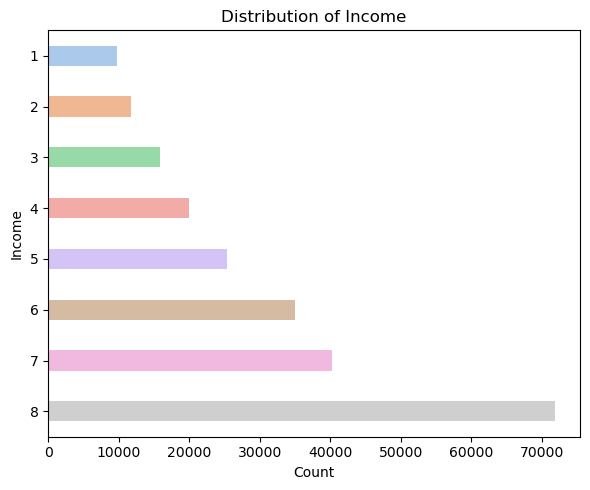

In [20]:
# Plot one by one
for col in ccat:
    plt.figure(figsize=(6,5))
    sns.countplot(data=diabetes_df, y=col, palette='pastel',width=0.4)
    plt.title(f'Distribution of {col}')
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

From these countplots, we can observe the frequency of each category across the dataset. Initially, the target Diabetes_Class contained three distinct classes: No Diabetes (0), Pre-diabetes (1), and Diabetes (2). Given the low representation of pre-diabetic cases, we combined them with diabetic cases to form a binary classification target:

0: Not Diabetic

1: Diabetic (includes both previously pre-diabetic and diabetic)

This allows us to preserve at-risk individuals and improve the model’s ability to generalize.

In [21]:
diabetes_df.Diabetes_Class.value_counts().sort_index()

0    190055
1      4629
2     35097
Name: Diabetes_Class, dtype: int64

In [22]:
# Reclassify both pre-diabetic (1) and diabetic (2) as 1
diabetes_df['Diabetes_Class'] = diabetes_df['Diabetes_Class'].replace({1: 1, 2: 1})

In [23]:
diabetes_df.Diabetes_Class.value_counts().sort_index()

0    190055
1     39726
Name: Diabetes_Class, dtype: int64

In [24]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Diabetes_Class           229781 non-null  int64
 1   HighBP                   229781 non-null  int64
 2   HighChol                 229781 non-null  int64
 3   CholCheck                229781 non-null  int64
 4   BMI                      229781 non-null  int64
 5   Smoker                   229781 non-null  int64
 6   Stroke                   229781 non-null  int64
 7   HeartDisease_or_Attack   229781 non-null  int64
 8   Physical_Activity        229781 non-null  int64
 9   Fruits                   229781 non-null  int64
 10  Veggies                  229781 non-null  int64
 11  Heavy_Alcohol_Use        229781 non-null  int64
 12  AnyHealthcare            229781 non-null  int64
 13  Doctor_unavailable_cost  229781 non-null  int64
 14  General_Health           229781 non-

#### Summary: Univariate Insights for Categorical Features

| Feature Category          | Features                                      | Insight Summary                                                                 | Action                                                           |
|---------------------------|-----------------------------------------------|----------------------------------------------------------------------------------|------------------------------------------------------------------|
|  Target Variable         | `Diabetes_Class`                              | Imbalanced — most samples are non-diabetic (0)                                  | Balance the dataset (SMOTE, stratified split, undersampling)     |
|  Clinical Risk Factors   | `HighBP`, `HighChol`                          | Large portion have high BP and cholesterol — key diabetes risk factors          | Retain as important features                                     |
|  Lifestyle & Behavior    | `Smoker`                                      | Moderate split; may correlate with other risks                                  | Retain for modeling                                               |
|  Healthcare Access       | `CholCheck`, `AnyHealthcare`                 | Very low variance (almost all have healthcare & recent check)                   | Consider dropping (low predictive power)                          |
|  Serious Conditions      | `Stroke`, `HeartDisease_or_Attack`           | Rare cases but clinically relevant                                               | Keep, possibly apply class weighting or resampling                |
|  Health Habits         | `PhysActivity`, `Fruits`, `Veggies`          | Some show healthy behaviors, others don’t — behavioral risk markers             | Retain — valuable lifestyle predictors                            |
|  Alcohol Use             | `HeavyAlcoholUse`                             | Majority not heavy drinkers; skewed but aligns with risk                         | Retain — may interact with other lifestyle variables              |
|  General Health & Access | `GenHlth`, `Difficulty_Walking`, `Doctor_unavailable_cost` | Reflect health burden and access to care                      | Retain — important for mobility and socioeconomic risks           |
|  Demographics          | `Sex`                                         | Likely balanced; moderate predictor                                              | Retain, but expect modest impact                                  |
|  Socioeconomic Factors   | `Age_Group`, `Education_Level`, `Income`      | Older age, lower income/education associated with higher diabetes risk          | Retain — strong predictive indicators                             |



#### Multivariate Analysis for Numerical Features w.r.t Target Variable

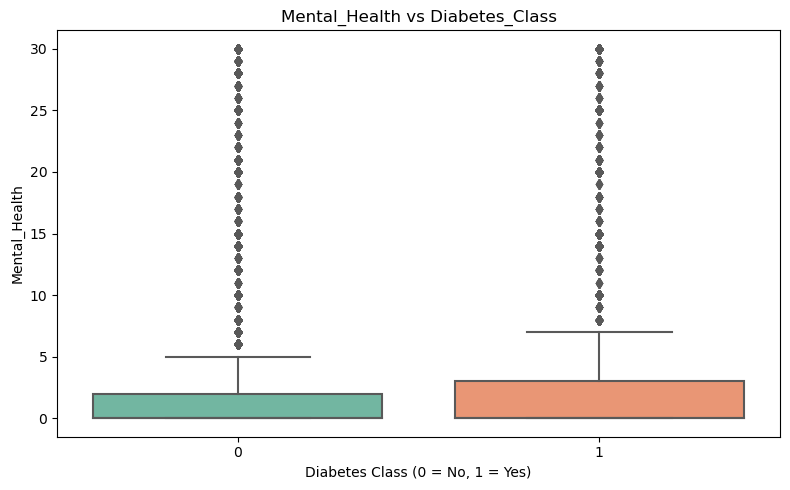

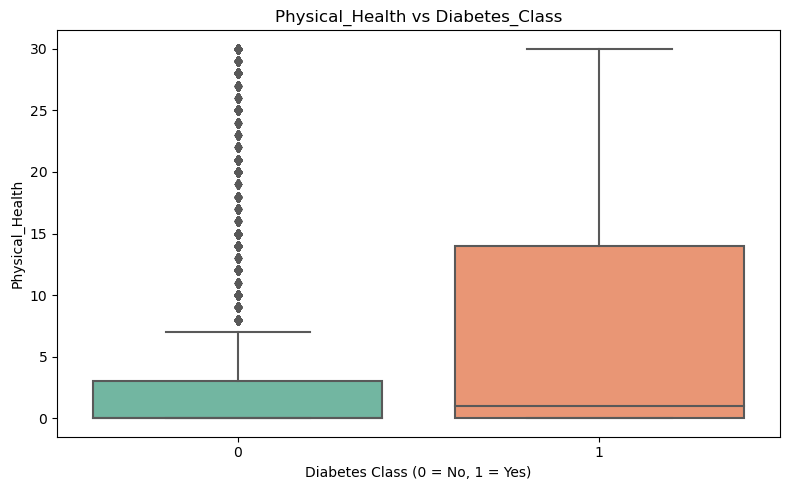

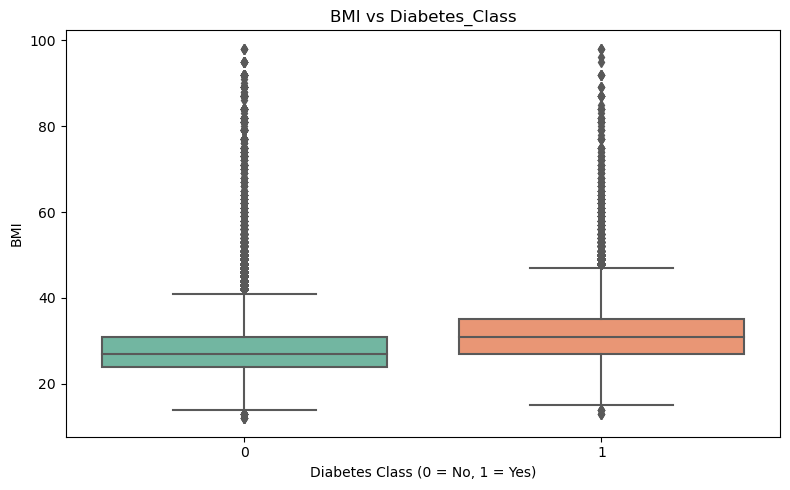

In [25]:
# Numerical columns to evaluate
ncol = ['Mental_Health', 'Physical_Health', 'BMI']

# Loop through each feature to compare with Diabetes_Class
for col in ncol:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=diabetes_df, x='Diabetes_Class', y=col, palette='Set2')
    plt.title(f'{col} vs Diabetes_Class')
    plt.xlabel('Diabetes Class (0 = No, 1 = Yes)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


####  Summary: Multivariate Analysis Insights for Numerical Features

| Feature          | Observation in Diabetic Group                | Observation in Non-Diabetic Group     | Key Insight                                                                 |
|------------------|-----------------------------------------------|----------------------------------------|------------------------------------------------------------------------------|
| **Mental_Health** | Higher median and wider spread of unhealthy days; more outliers | Lower median and fewer outliers        | Mental health issues are more prevalent among diabetics                    |
| **Physical_Health** | Much higher spread; upper quartile and median are elevated | Lower and tighter distribution         | Physical health declines significantly among diabetic individuals          |
| **BMI**          | Higher median BMI with more extreme values   | Lower median; fewer outliers           | Strong link between higher BMI and diabetes (potential obesity risk factor) |

 These differences reinforce the importance of these features as strong predictors of diabetes status in future modeling.


#### Multivariate Analysis for Categorical Features w.r.t Target Variable

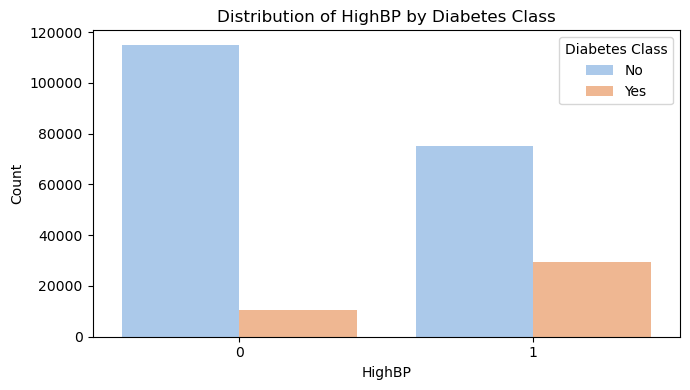

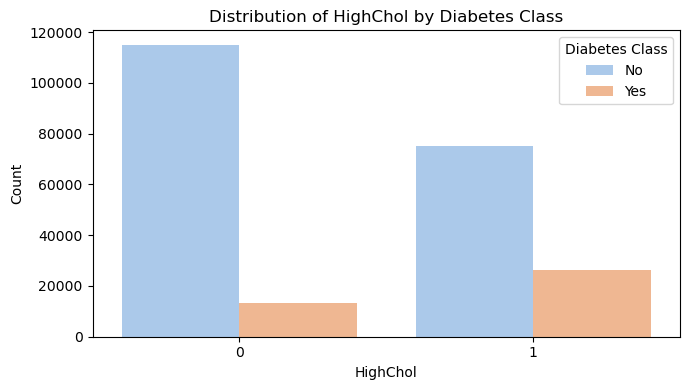

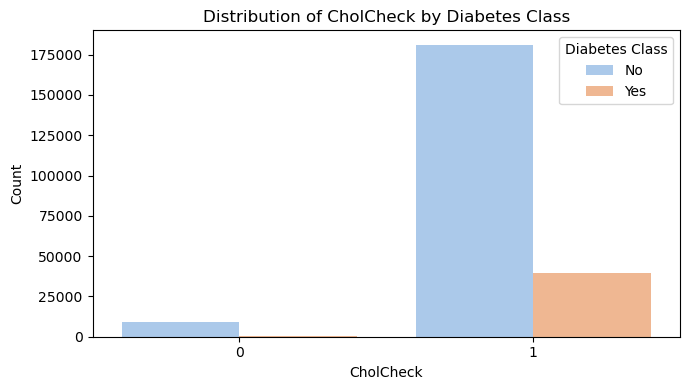

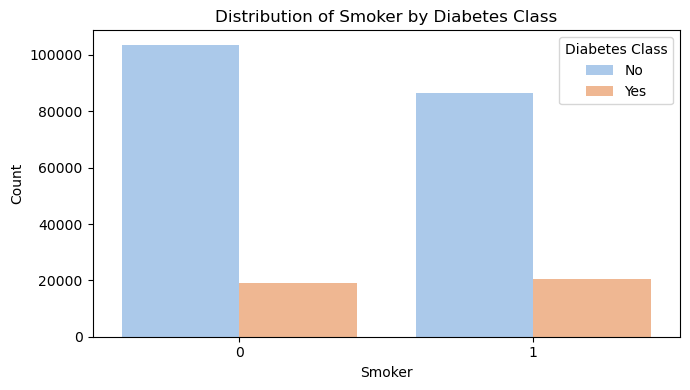

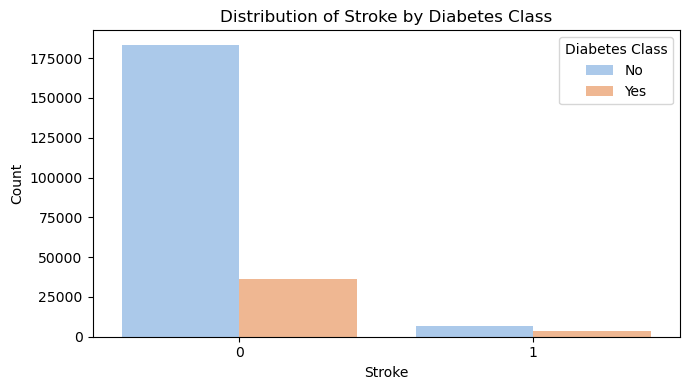

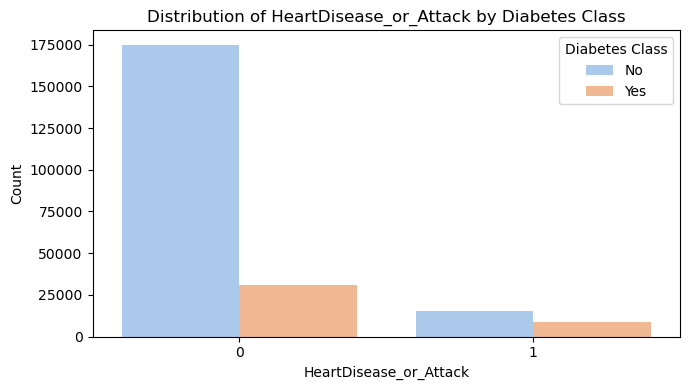

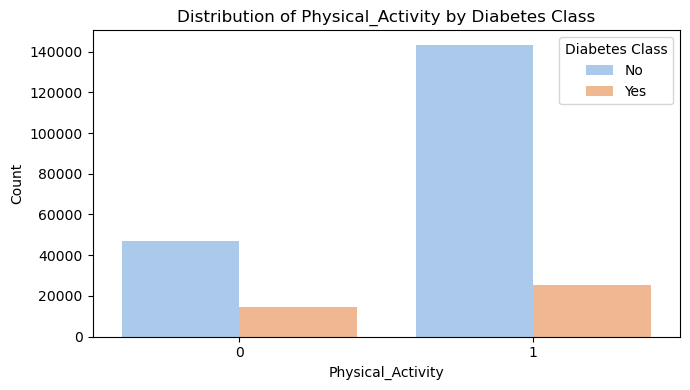

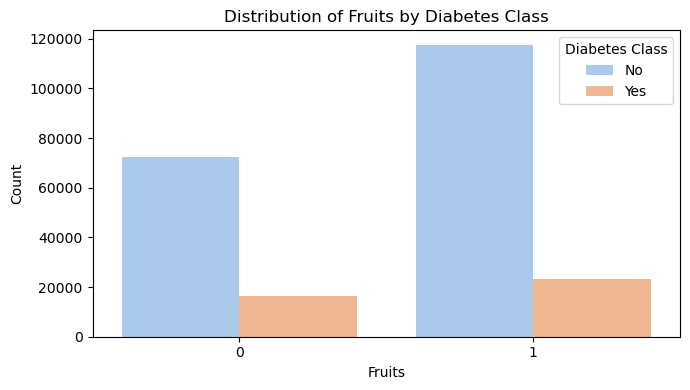

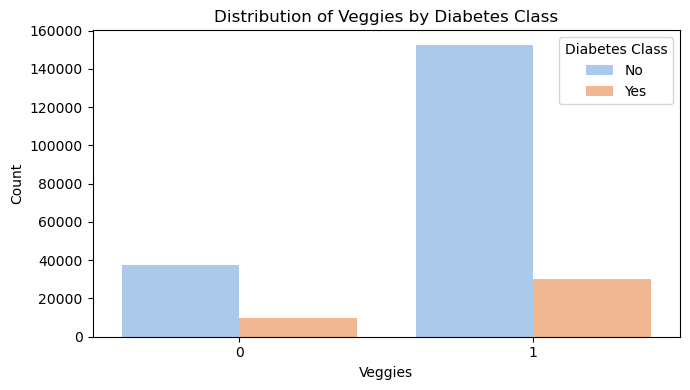

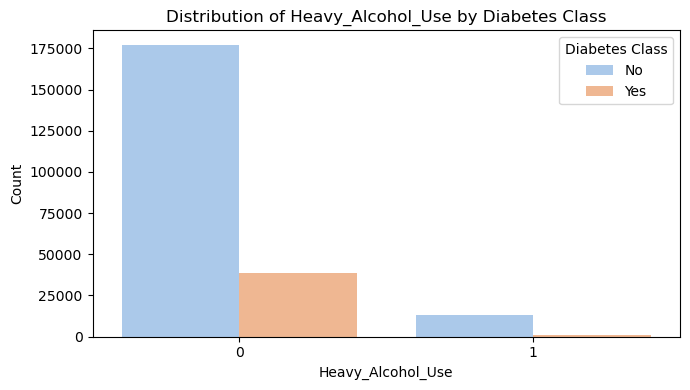

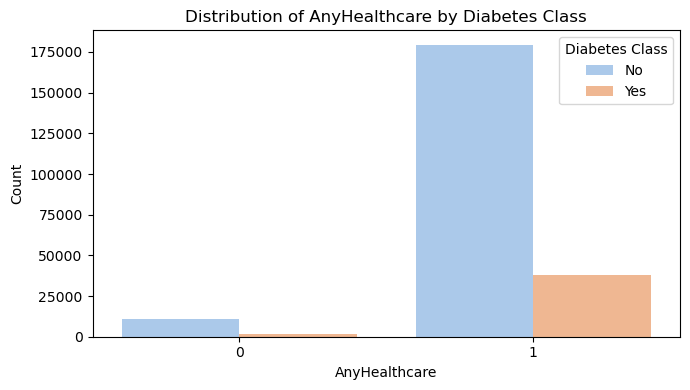

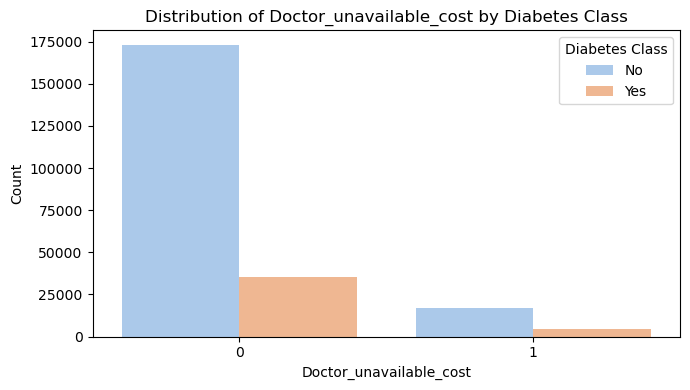

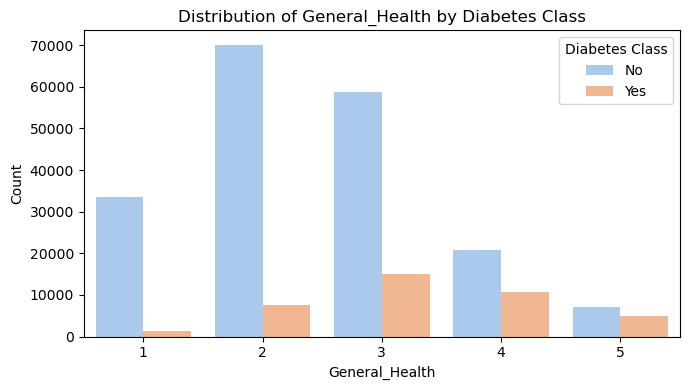

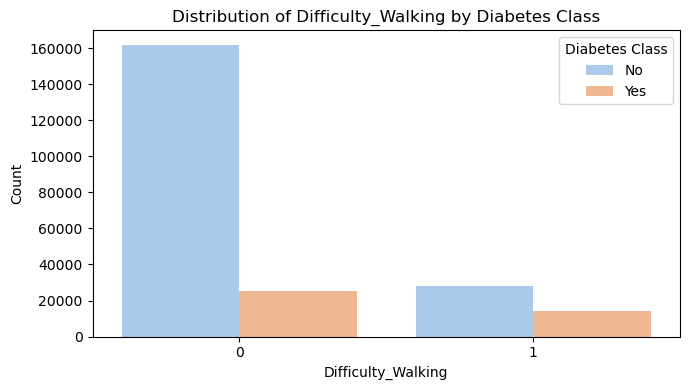

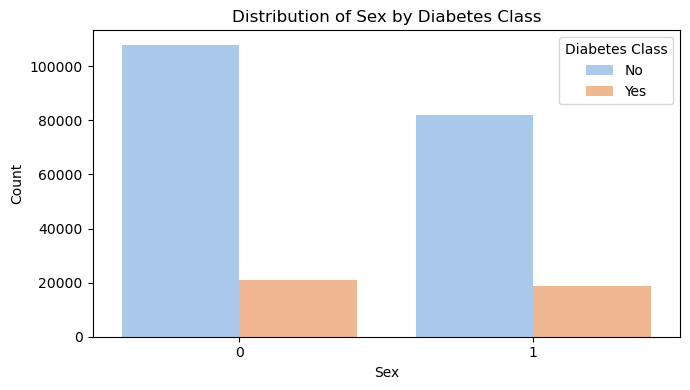

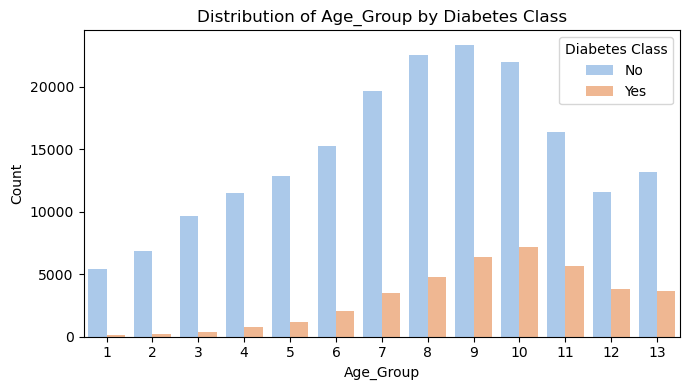

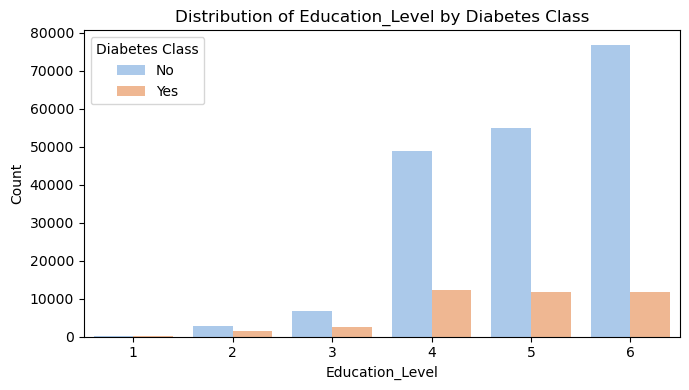

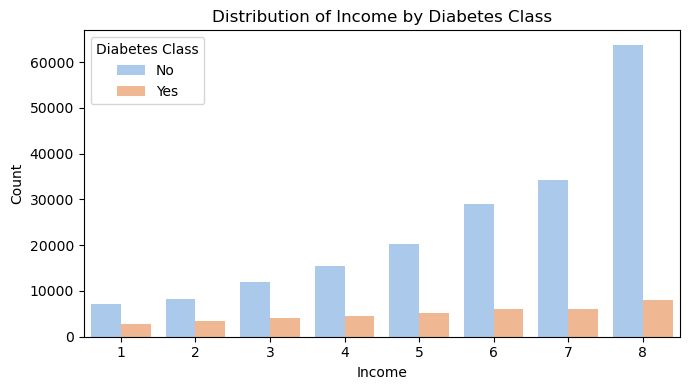

In [26]:
# Categorical columns to analyze (excluding numerical ones)
ncol = ['Mental_Health', 'Physical_Health', 'BMI']
ccat = [col for col in diabetes_df.columns if col not in ncol + ['Diabetes_Class']] #creates a combined list of numerical columns plus target columns and then filters out any column that is not in it and stores in ccat

# Plot grouped bar charts
for col in ccat:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=diabetes_df, x=col, hue='Diabetes_Class', palette='pastel')
    plt.title(f'Distribution of {col} by Diabetes Class')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Diabetes Class", labels=["No", "Yes"])
    plt.tight_layout()
    plt.show()


####  Summary: Multivariate Analysis Insights for Numerical Features

| Feature Category          | Features                                                | Key Insight                                                                   | Actionable Note                                                           |
| ------------------------- | ------------------------------------------------------- | ----------------------------------------------------------------------------- | ------------------------------------------------------------------------- |
| **Clinical Risk Factors** | `HighBP`, `HighChol`                                    | Higher rates of diabetes observed among those with high BP and cholesterol    | Strong indicators — retain for modeling                                   |
| **Lifestyle & Behavior**  | `Smoker`, `PhysActivity`, `Fruits`, `Veggies`           | Physical inactivity and low fruit/veggie intake trend higher with diabetes    | Keep — behavioral predictors valuable for intervention                    |
| **Serious Conditions**    | `Stroke`, `HeartDisease_or_Attack`                      | Patients with these conditions show higher diabetes class ratios              | Retain — strong health-related risk markers                               |
| **Healthcare Access**     | `CholCheck`, `AnyHealthcare`, `Doctor_unavailable_cost` | Minor differences; majority have access, but cost concern links with diabetes | Consider retaining `Doctor_unavailable_cost`, drop others if low variance |
| **Demographics**          | `Sex`, `Age_Group`                                      | Older age groups have a higher diabetes rate; sex shows minimal impact        | Retain `Age_Group`; `Sex` may have modest predictive power                |
| **Socioeconomic Factors** | `Education_Level`, `Income`                             | Lower education and income levels correlate with higher diabetes incidence    | Retain — strong predictors of chronic disease risk                        |
| **Mobility & Health**     | `GenHlth`, `Difficulty_Walking`                         | Worse general health and difficulty walking associated with diabetes          | Retain — meaningful mobility and wellness indicators                      |


## FEATURE ENGINEERING - ONE HOT ENCODING

Since most of my categorical features are already in binary format (sex, smoker, stroke,highBP etc.) there is no need for one hot encoding. However, for features like age_group, education level and income, there are more than just two outcomes (ranked but not continous), these should be encoded for correlation matrix

 **Encoding Strategy Rationale**
 
To prepare our categorical features for modeling, we used a combination of ordinal encoding and one-hot encoding, based on the nature of each variable:

 **Ordinal Encoding**
 
These variables have a clear and meaningful order where higher values indicate progression (e.g., older age groups, higher education, or income brackets). Ordinal encoding preserves this ranking and enables models to leverage the inherent hierarchy in the data. 
We applied ordinal encoding to the following features:

**Age_Group**

**Education_Level**

**Income**


**One-Hot Encoding**

I applied one-hot encoding to **General_Health**.

Although it appears ordinal (e.g., Excellent to Poor), General_Health is subjective and self-reported, and the intervals between categories are not guaranteed to be consistent or linear. To avoid misleading the model into assuming a numeric relationship that may not exist, we treated it as a nominal variable using one-hot encoding.

This balanced approach ensures we preserve useful structure while avoiding incorrect assumptions about the relationships between categories

In [27]:
# Copy the dataframe so that we can work on that without affecting the original dataframe
df_encoded = diabetes_df.copy()

# Apply ordinal encoding to ordinal features
ordinal_cols = ['Age_Group', 'Education_Level', 'Income']
df_encoded[ordinal_cols] = df_encoded[ordinal_cols].astype(int)  #treating them as ordered intergers, preserving their ordinal structure

# One-hot encode 'General_Health' (still okay since it's not strictly ordinal)
df_encoded = pd.get_dummies(df_encoded, columns=['General_Health'], drop_first=True)


In [28]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229781 entries, 0 to 253679
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Diabetes_Class           229781 non-null  int64
 1   HighBP                   229781 non-null  int64
 2   HighChol                 229781 non-null  int64
 3   CholCheck                229781 non-null  int64
 4   BMI                      229781 non-null  int64
 5   Smoker                   229781 non-null  int64
 6   Stroke                   229781 non-null  int64
 7   HeartDisease_or_Attack   229781 non-null  int64
 8   Physical_Activity        229781 non-null  int64
 9   Fruits                   229781 non-null  int64
 10  Veggies                  229781 non-null  int64
 11  Heavy_Alcohol_Use        229781 non-null  int64
 12  AnyHealthcare            229781 non-null  int64
 13  Doctor_unavailable_cost  229781 non-null  int64
 14  Mental_Health            229781 non-

In [29]:
df_encoded.head()

,Diabetes_Class,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDisease_or_Attack,Physical_Activity,Fruits,...,Physical_Health,Difficulty_Walking,Sex,Age_Group,Education_Level,Income,General_Health_2,General_Health_3,General_Health_4,General_Health_5
0,0,1,1,1,40,1,0,0,0,0,...,15,1,0,9,4,3,0,0,0,1
1,0,0,0,0,25,1,0,0,1,0,...,0,0,0,7,6,1,0,1,0,0
2,0,1,1,1,28,0,0,0,0,1,...,30,1,0,9,4,8,0,0,0,1
3,0,1,0,1,27,0,0,0,1,1,...,0,0,0,11,3,6,1,0,0,0
4,0,1,1,1,24,0,0,0,1,1,...,0,0,0,11,5,4,1,0,0,0


In [30]:
df_encoded.describe()

,Diabetes_Class,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDisease_or_Attack,Physical_Activity,Fruits,...,Physical_Health,Difficulty_Walking,Sex,Age_Group,Education_Level,Income,General_Health_2,General_Health_3,General_Health_4,General_Health_5
count,229781.000000,229781.000000,229781.000000,229781.000000,229781.00000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,...,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000,229781.000000
mean,0.172886,0.454441,0.441760,0.959535,28.68567,0.465661,0.044756,0.103216,0.733355,0.612966,...,4.675178,0.185507,0.439231,8.086582,4.980568,5.890383,0.337434,0.320801,0.137287,0.052563
std,0.378150,0.497921,0.496598,0.197047,6.78636,0.498821,0.206767,0.304241,0.442206,0.487073,...,9.046568,0.388709,0.496295,3.093809,0.992895,2.092477,0.472835,0.466786,0.344151,0.223160
min,0.000000,0.000000,0.000000,0.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,24.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,27.00000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,32.00000,1.000000,0.000000,0.000000,1.000000,1.000000,...,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000,1.000000,1.000000,1.000000


## FEATURE SELECTION

#### Correlation Matrix and VIF- Checking for Multi-collinearity

In [31]:
# Pull out the X and y
X = df_encoded.drop("Diabetes_Class", axis=1)
y = df_encoded["Diabetes_Class"].copy()

In [32]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDisease_or_Attack,Physical_Activity,Fruits,Veggies,...,Physical_Health,Difficulty_Walking,Sex,Age_Group,Education_Level,Income,General_Health_2,General_Health_3,General_Health_4,General_Health_5
0,1,1,1,40,1,0,0,0,0,1,...,15,1,0,9,4,3,0,0,0,1
1,0,0,0,25,1,0,0,1,0,0,...,0,0,0,7,6,1,0,1,0,0
2,1,1,1,28,0,0,0,0,1,0,...,30,1,0,9,4,8,0,0,0,1
3,1,0,1,27,0,0,0,1,1,1,...,0,0,0,11,3,6,1,0,0,0
4,1,1,1,24,0,0,0,1,1,1,...,0,0,0,11,5,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,5,0,1,5,6,7,0,1,0,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,1,0,11,2,4,0,0,1,0
253677,0,0,1,28,0,0,0,1,1,0,...,0,0,0,2,5,2,0,0,0,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,0,1,7,5,1,0,1,0,0


In [33]:
X.shape

(229781, 24)

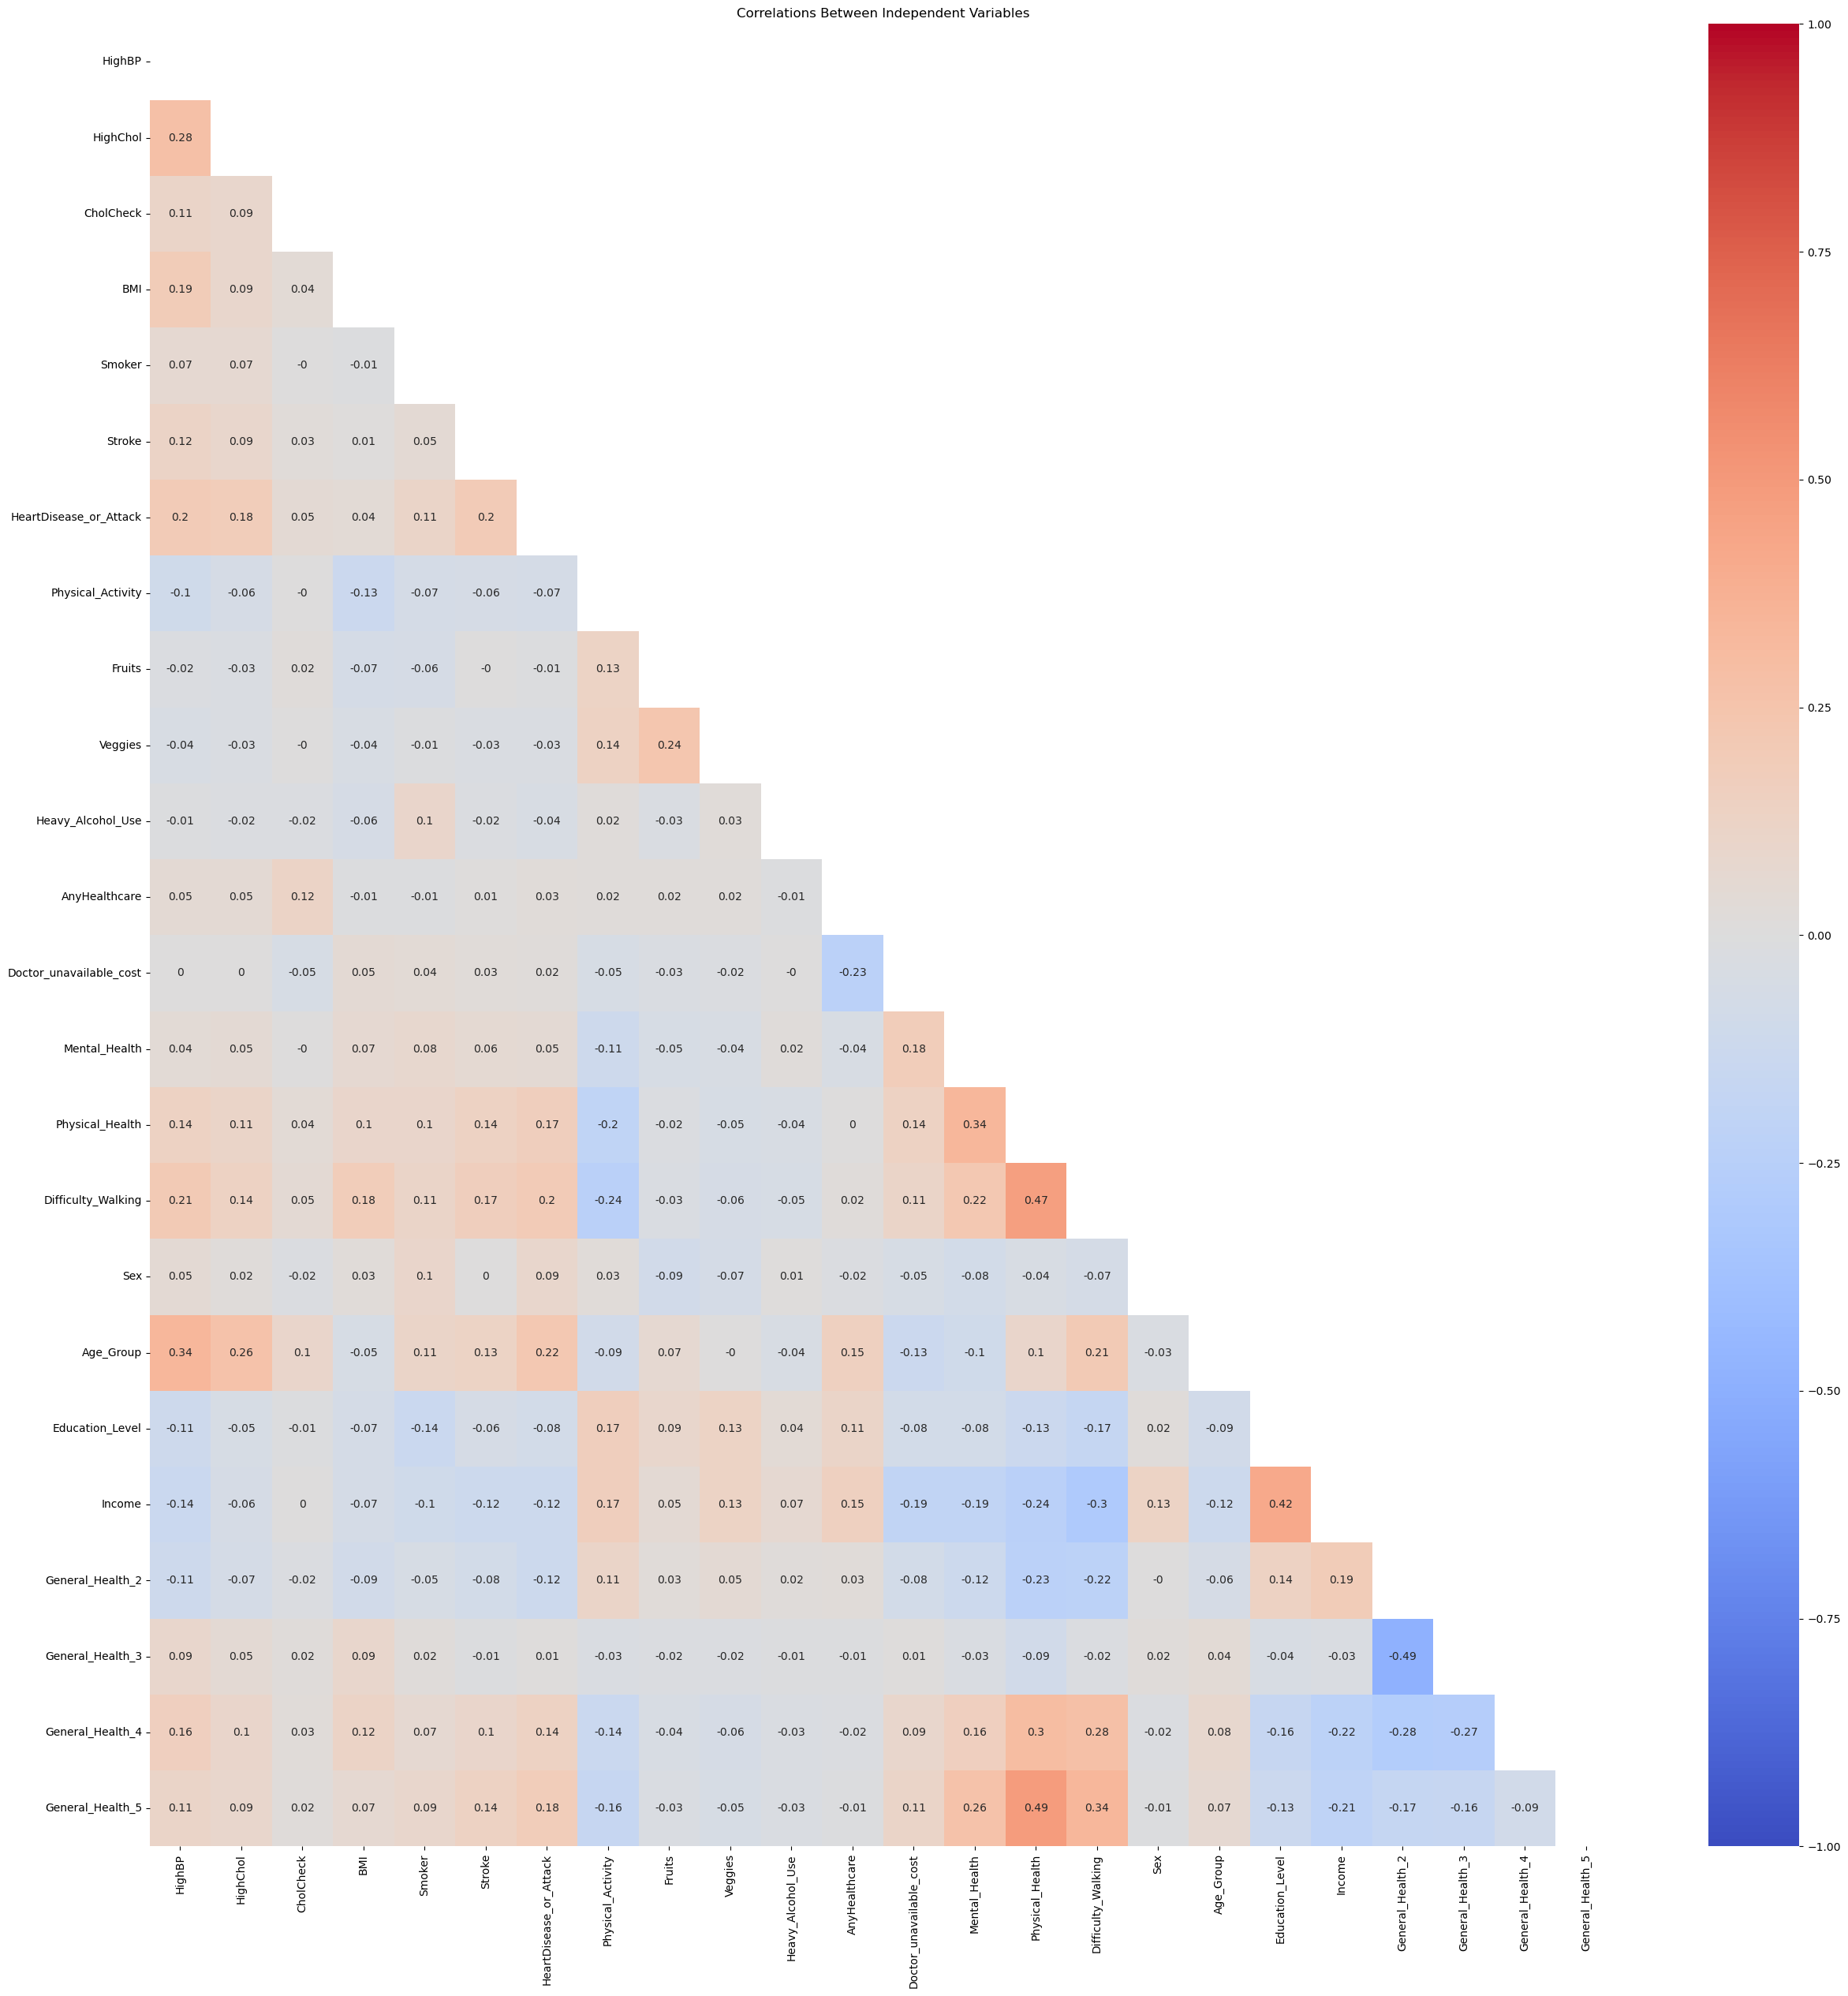

In [34]:
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(30, 30))
sns.heatmap(
    corr_df.round(2), 
    annot=True, 
    vmax=1, 
    vmin=-1, 
    center=0, 
    cmap="coolwarm", 
    mask=mask
)

plt.title("Correlations Between Independent Variables")
plt.show()

Here we can see that there is no strong multi-collinearity. All the correlation are < 0.5 and thus all features are significant

Detecting Multicollinearity With Variance Inflation Factors

Looking only at correlations won't detect multicollinearity, hence we need a new tool: the **Variance Inflation Factor** (VIF). 

In [35]:
# Adding the constant to the features 
X_with_const = sm.add_constant(X)

In [36]:
VIF_values = pd.Series(
    data=[variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])],
    index=X_with_const.columns
)

VIF_values[1:] # Slicing to leave out the constant

HighBP                     1.303054
HighChol                   1.158629
CholCheck                  1.035380
BMI                        1.125788
Smoker                     1.076457
Stroke                     1.079204
HeartDisease_or_Attack     1.172596
Physical_Activity          1.131005
Fruits                     1.098301
Veggies                    1.098321
Heavy_Alcohol_Use          1.026362
AnyHealthcare              1.110093
Doctor_unavailable_cost    1.135892
Mental_Health              1.227475
Physical_Health            1.759796
Difficulty_Walking         1.530483
Sex                        1.076647
Age_Group                  1.354013
Education_Level            1.273702
Income                     1.435877
General_Health_2           2.177042
General_Health_3           2.329259
General_Health_4           2.223536
General_Health_5           2.026887
dtype: float64

A high VIF means that the independent variable in question has a higher level of multi-collinearity with the other independent variables.

An obvious step would be to just drop the columns with the highest VIF numbers. One thing to note however is that dropping one variable will change the VIFs for *all the independent variables*.

For our case, as we see above none of our remaining variables has a VIF greater then 5. This means we can now proceed onwards to modeling.

## FEATURE IMPORTANCE-Hypothesis testing

#### Chi-Squared test for independence

$$H_0: \text{There is no relationship between features and Diabetes_Class} \;\; vs \;\;  H_1: \text{There is a relationship between features and Diabetes_Class.}$$

In [37]:
chi2_results = []

for col in df_encoded.columns:
    if col != 'Diabetes_Class' and df_encoded[col].nunique() <= 10:
        # Create contingency table
        contingency = pd.crosstab(df_encoded[col], df_encoded['Diabetes_Class'])
        
        # Run chi-squared test
        chi2, p,_,_  = chi2_contingency(contingency)
        
        # Store all results
        chi2_results.append((col, chi2, p))

# Convert to DataFrame for easy viewing
chi2_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi2_statistic', 'p_value'])
print(chi2_df)

                    Feature  Chi2_statistic        p_value
0                    HighBP    15573.157501   0.000000e+00
1                  HighChol     9600.741830   0.000000e+00
2                 CholCheck     1332.836791  8.267888e-292
3                    Smoker      491.535203  6.603445e-109
4                    Stroke     2191.404084   0.000000e+00
5    HeartDisease_or_Attack     6421.029333   0.000000e+00
6         Physical_Activity     2408.386726   0.000000e+00
7                    Fruits      143.108340   5.565998e-33
8                   Veggies      431.298564   8.477284e-96
9         Heavy_Alcohol_Use     1003.558646  3.025142e-220
10            AnyHealthcare      129.395675   5.556132e-30
11  Doctor_unavailable_cost      154.380211   1.912663e-35
12       Difficulty_Walking     9951.876590   0.000000e+00
13                      Sex      217.779271   2.759257e-49
14          Education_Level     2832.881169   0.000000e+00
15                   Income     5115.857122   0.000000e+

There is a statistically significant association between each tested categorical feature and diabetes status since p-value <0.05 for all features, thus we need to consider all for modelling


#### 2 Samples unpaired t-test 

We performed a two-sample unpaired t-test to compare the means of BMI, Mental Health, and Physical Health between diabetic and non-diabetic individuals.

**Hypotheses:**
- H₀: Mean of feature is the same for diabetic vs non-diabetic individuals.
- H₁: Mean of feature is different for the two groups

All p-values were < 0.05, so we reject the null hypothesis for each variable. These results indicate that BMI, mental health, and physical health significantly differ between diabetic and non-diabetic groups.


In [38]:
# Choose numerical features
num_features = ['BMI', 'Mental_Health', 'Physical_Health']
t_test_results = []

for col in num_features:
    group0 = df_encoded[df_encoded['Diabetes_Class'] == 0][col]
    group1 = df_encoded[df_encoded['Diabetes_Class'] == 1][col]
    t_stat, p_val = ttest_ind(group0, group1, equal_var=True)  
    t_test_results.append((col, p_val))

t_test_df = pd.DataFrame(t_test_results, columns=['Feature', 'TTest_p_value'])
print(t_test_df)


           Feature  TTest_p_value
0              BMI   0.000000e+00
1    Mental_Health  3.061770e-175
2  Physical_Health   0.000000e+00


There is a statistically significant difference in BMI, mental health days, and physical health days between diabetic and non-diabetic individuals. 



In [39]:
#Saving the Datafile up to encoding and pre-processing

df_encoded.to_csv('diabetes_encoded.csv', index=False)
diabetes_df.to_csv('diabetes_cleaned.csv', index=False)

In [45]:
df_encoded.to_csv("diabetes_dataset_for_tableau.csv", index=False)